# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
# Trabalho com os dados
import pandas as pd
import numpy as np
from joblib import load, dump

# Plot de figuras
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [2]:
# Importe dos dados
X_train = load("./data/X_train_df")
y_train = load("./data/y_train_df")
X_test = load("./data/X_test_df")
y_test = load("./data/y_test_df")

print(
        f"X_train: {np.array(X_train).shape}\n",
        f"y_train: {np.array(y_train).shape}\n",
        f"X_test: {np.array(X_test).shape}\n",
        f"y_test: {np.array(y_test).shape}\n",
)

X_train: (7352, 561)
 y_train: (7352,)
 X_test: (2210, 561)
 y_test: (2210,)



In [3]:
# Obtendo os dados de validação, dividindo os dados de teste
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, random_state=0)

print(
        f"X_train: {np.array(X_train).shape}\n",
        f"y_train: {np.array(y_train).shape}\n",
        f"X_valid: {np.array(X_valid).shape}\n",
        f"y_valid: {np.array(y_valid).shape}\n",
        f"X_test: {np.array(X_test).shape}\n",
        f"y_test: {np.array(y_test).shape}\n",
)

X_train: (7352, 561)
 y_train: (7352,)
 X_valid: (553, 561)
 y_valid: (553,)
 X_test: (1657, 561)
 y_test: (1657,)



In [4]:
# Salvando variáveis dependentes
dump(y_valid, "./data/y_valid_df")

# Salvando variáveis independentes
dump(X_valid, "./data/X_valid_df")

['./data/X_valid_df']

## Conclusão
- Os dados foram importados corretamente
- Foi obtido o banco de validação

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [5]:
# Instanciando os objetos com os algoritmos de árvores
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
clf

DecisionTreeClassifier(max_depth=4, random_state=123)

In [6]:
# Treinamento da árvore
clf.fit(X_train, y_train)

# Verificando as métricas treino
mse2 = clf.score(X_train, y_train)

template = "O R² da árvore com profundidade "
template += f"{clf.get_depth()} é: {mse2:.2f}".replace(".",",")
print("Treinamento")
print(template)

Treinamento
O R² da árvore com profundidade 4 é: 0,70


In [7]:
# Instanciando uma DataFrame com a importância e o nome de cada variável
importances = pd.DataFrame(
    data={
        "importance": clf.feature_importances_,
        "columns": X_train.columns
        }
    )
importances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   importance  561 non-null    float64
 1   columns     561 non-null    object 
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [8]:
# Ordenando as variáveis por importância para o modelo
importances_largest = importances[importances['importance'] != 0.0].sort_values(by="importance", ascending=False)
importances_largest

,importance,columns
8,0.380260,9 tBodyAcc-mad()-Z
4,0.120308,5 tBodyAcc-std()-Y
85,0.113273,86 tBodyAccJerk-std()-Z
76,0.098107,"77 tGravityAcc-arCoeff()-Z,4"
75,0.071174,"76 tGravityAcc-arCoeff()-Z,3"
62,0.053153,63 tGravityAcc-entropy()-X
79,0.047593,"80 tGravityAcc-correlation()-Y,Z"
74,0.031425,"75 tGravityAcc-arCoeff()-Z,2"
222,0.024767,223 tGravityAccMag-arCoeff()1
3,0.023077,4 tBodyAcc-std()-X


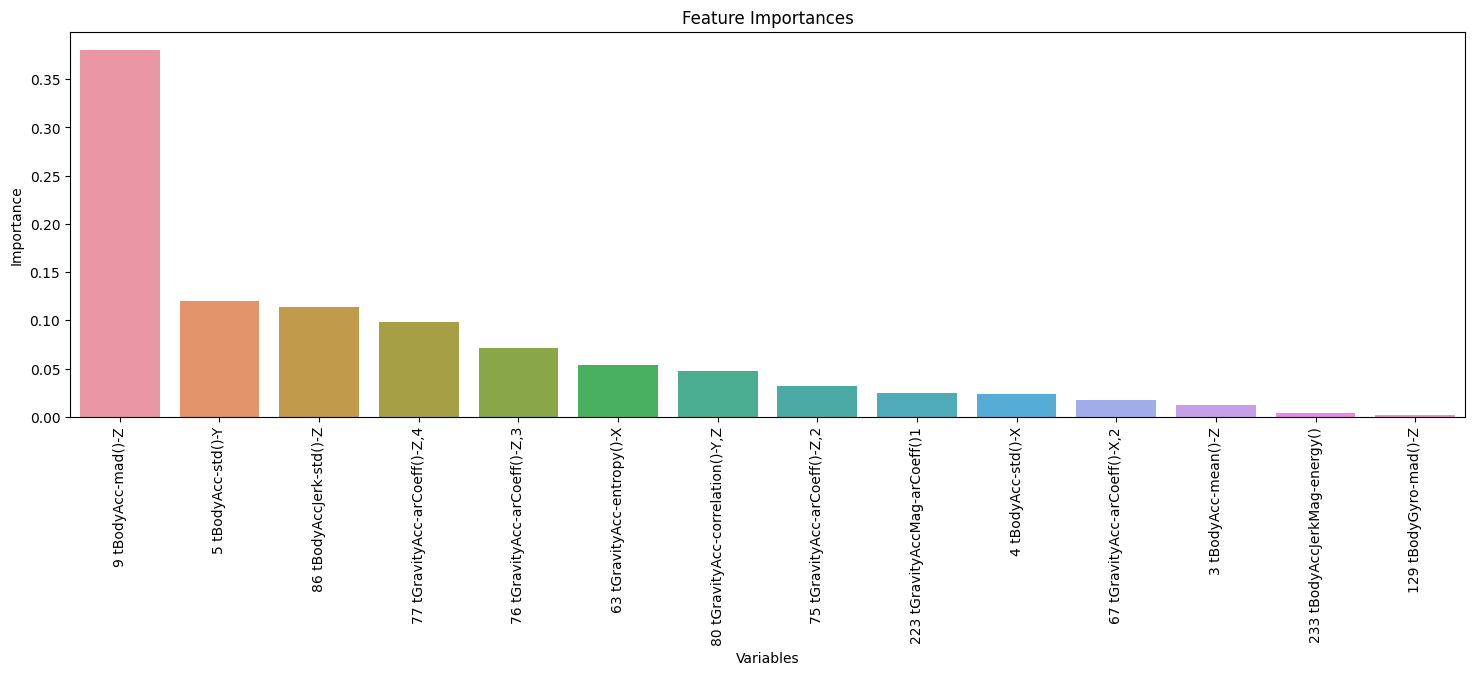

In [9]:
# Plotando as informações de importância das variáveis
plt.figure(figsize=(18, 5))
sns.barplot(
    x="columns",
    y="importance",
    data=importances_largest
)
plt.title("Feature Importances")
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

In [10]:

def test_variable(n: int = 5) -> None:
    '''
    Função para teste de acurrácia de modelos de árvores, com diferentes 
    números de variáveis.
    :param n (int): Número de variáveis no modelo
    '''
    importances_nlargest = importances_largest.loc[importances_largest['importance'].nlargest(n=n).index, :]
    X_train_new = X_train[importances_nlargest['columns']].copy()

    # Treinamento da árvore
    clf.fit(X_train_new, y_train)

    # Verificando as métricas treino
    mse2 = clf.score(X_train_new, y_train)

    template = "O R² da árvore com profundidade "
    template += f"{clf.get_depth()} é: {mse2:.2f}".replace(".",",")
    print("Treinamento")
    print(template)

    return None

In [11]:
# Obtendo árvores com número crescente de variáveis e analisando a acurácia.
for n in range(1, 15):
    print(f"n: {n} ------")
    test_variable(n=n)

n: 1 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,43
n: 2 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,50
n: 3 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,54
n: 4 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,63
n: 5 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,66
n: 6 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,68
n: 7 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,68
n: 8 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,68
n: 9 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,69
n: 10 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,69
n: 11 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,70
n: 12 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,70
n: 13 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,70
n: 14 ------
Treinamento
O R² da árvore com profundidade 4 é: 0,70


## Conclusão
- É possível observar que usando apenas 11 das 561 variáveis explicativas já é possível atingir a acurácia máxima do modelo;

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [12]:
# Selecionando as três variáveis explicativas com maior poder informativo
n = 3
importances_nlargest = importances_largest.loc[importances_largest['importance'].nlargest(n=n).index, :]
X_train_new = X_train[importances_nlargest['columns']].copy()
X_valid_new = X_valid[importances_nlargest['columns']].copy()
X_test_new = X_test[importances_nlargest['columns']].copy()

# Treinamento da árvore
clf.fit(X_train_new, y_train)

# Verificando as métricas treino
mse2 = clf.score(X_train_new, y_train)

template = "O R² da árvore com profundidade "
template += f"{clf.get_depth()} é: {mse2:.2f}".replace(".",",")
print("Treinamento")
print(template)

Treinamento
O R² da árvore com profundidade 4 é: 0,54


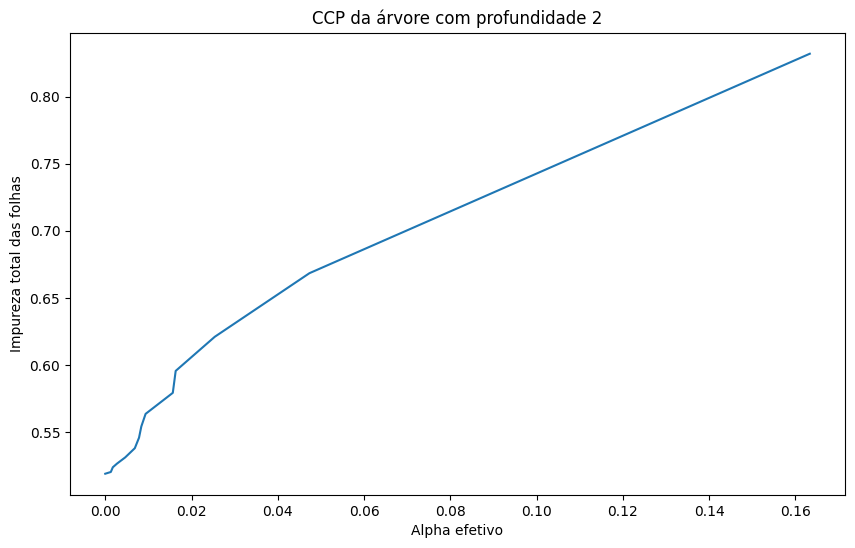

In [13]:
# Obtendo o caminho do CCP para árvore.
# Visualizando alphas e impurezas
path = clf.cost_complexity_pruning_path(X_valid_new, y_valid)
ccp_alphas_new, impurities_2 = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.title("CCP da árvore com profundidade 2")
plt.plot(ccp_alphas_new, impurities_2)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")
plt.show()

In [14]:
def treinamento_para_ccp_alpha(alpha: float) -> DecisionTreeClassifier:
  '''
    Função que determina instancia, treina e retorna um objeto
    DecisionTreeClassifier, com base em um alpha.
    :param alpha (float): Valor de impureza do Custo de Complexidade.
    :return clf (DecisionTreeClassifier): Arvore obtida com o alpha.
  '''
  clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=123)
  clf.fit(X_train_new, y_train)
  return clf

In [15]:
%%time
# Obtendo as árvores com os diferentes alpha
clfs_new = [treinamento_para_ccp_alpha(alpha) for alpha in ccp_alphas_new]

tree_depths_new = [clf.tree_.max_depth for clf in clfs_new]
accuracy_new_train = [clf.score(X_train_new, y_train) for clf in clfs_new]
accuracy_new_valid = [clf.score(X_valid_new, y_valid) for clf in clfs_new]
accuracy_new_test = [clf.score(X_test_new, y_test) for clf in clfs_new]
len(tree_depths_new)

CPU times: total: 1.36 s
Wall time: 1.94 s


14

In [16]:
# Instanciando DataFrame com as métricas as árvores
metricas_unique = {
    "ccp_alphas_new": ccp_alphas_new[:-1],
    "tree_depths_new": tree_depths_new[:-1],
    "accuracy_new_train": accuracy_new_train[:-1],
    "accuracy_new_test": accuracy_new_test[:-1],
    "accuracy_new_valid": accuracy_new_valid[:-1],
}
metricas_unique = pd.DataFrame(metricas_unique)
metricas_unique.describe()

,ccp_alphas_new,tree_depths_new,accuracy_new_train,accuracy_new_test,accuracy_new_valid
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.011347,5.923077,0.532989,0.451000,0.444985
std,0.012984,8.693499,0.145435,0.039502,0.039745
min,0.000000,2.000000,0.420294,0.398310,0.397830
25%,0.002722,2.000000,0.471708,0.429089,0.419530
50%,0.007831,2.000000,0.471708,0.429089,0.419530
75%,0.015660,5.000000,0.551007,0.496077,0.486438
max,0.047341,34.000000,0.987078,0.506337,0.504521


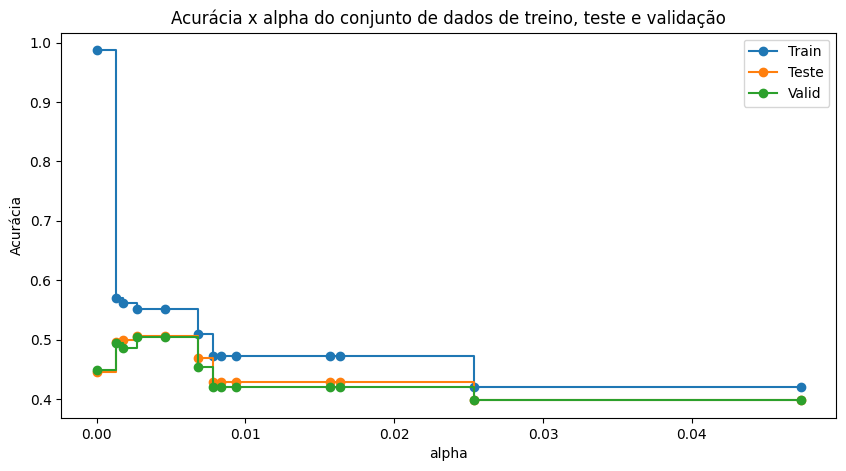

In [17]:
# Plotando as acurácias de teste, treino e validação para os CCP-aplha das árvores
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino, teste e validação")
ax.plot(
    metricas_unique['ccp_alphas_new'],
    metricas_unique['accuracy_new_train'],
    marker='o',
    label="Train",
    drawstyle="steps-post"
)
ax.plot(
    metricas_unique['ccp_alphas_new'],
    metricas_unique['accuracy_new_test'],
    marker='o',
    label="Teste",
    drawstyle="steps-post"
)
ax.plot(
    metricas_unique['ccp_alphas_new'],
    metricas_unique['accuracy_new_valid'],
    marker='o',
    label="Valid",
    drawstyle="steps-post"
)
ax.legend()
plt.show()

d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

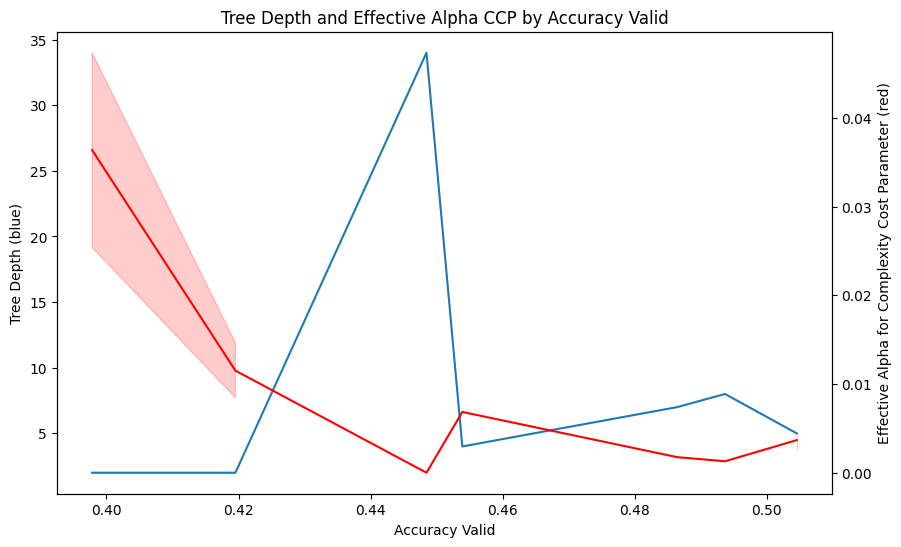

In [18]:
# Plot das profundidades das árvores
plt.figure(figsize=(10, 6))
plt.title("Tree Depth and Effective Alpha CCP by Accuracy Valid")
sns.lineplot(
    x="accuracy_new_valid",
    y="tree_depths_new",
    data=metricas_unique
)
plt.xlabel("Accuracy Valid")
plt.ylabel("Tree Depth (blue)")
ax2 = plt.twinx()
sns.lineplot(
    x="accuracy_new_valid",
    y="ccp_alphas_new",
    data=metricas_unique,
    color="r",
    ax=ax2
)
plt.ylabel("Effective Alpha for Complexity Cost Parameter (red)")
plt.show()

## Conclusão
- Na base de validação encontramos acurácias próximas das de teste.

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [19]:
metricas_unique[metricas_unique['accuracy_new_test'] == metricas_unique['accuracy_new_test'].max()]

,ccp_alphas_new,tree_depths_new,accuracy_new_train,accuracy_new_test,accuracy_new_valid
3,0.002722,5,0.551007,0.506337,0.504521
4,0.004623,5,0.551007,0.506337,0.504521


d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

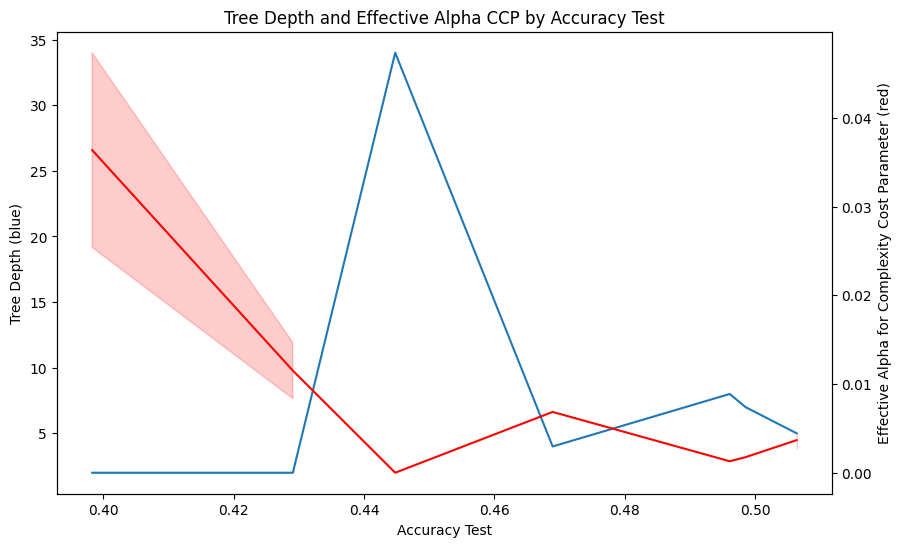

In [20]:
# Plot das profundidades das árvores
plt.figure(figsize=(10, 6))
plt.title("Tree Depth and Effective Alpha CCP by Accuracy Test")
sns.lineplot(
    x="accuracy_new_test",
    y="tree_depths_new",
    data=metricas_unique
)
plt.xlabel("Accuracy Test")
plt.ylabel("Tree Depth (blue)")
ax2 = plt.twinx()
sns.lineplot(
    x="accuracy_new_test",
    y="ccp_alphas_new",
    data=metricas_unique,
    color="r",
    ax=ax2
)
plt.ylabel("Effective Alpha for Complexity Cost Parameter (red)")
plt.show()

## Conclusão
- Dois modelos apresentaram as melhores acurácias.

|CCP alpha|Depth|Acc. Train|Acc. Test|Acc. Valid|
|---|---|---|---|---|
|0.002722|5|0.551007|0.506337|0.504521|
|0.004623|5|0.551007|0.506337|0.504521|